In [1]:
import graph
import pandas
import numpy
import matplotlib
%matplotlib inline

/home/students/doorjo01/research/researchEnv/local/lib/python2.7/site-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


1
3
5
7
9
11
13
15
17
19
21
23
25
27
29


/home/students/doorjo01/research/researchEnv/local/lib/python2.7/site-packages/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


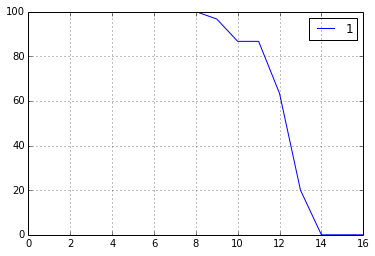

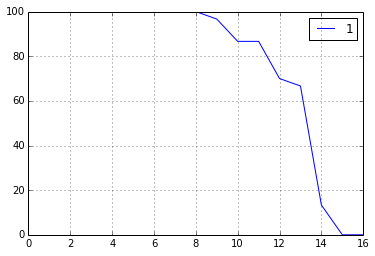

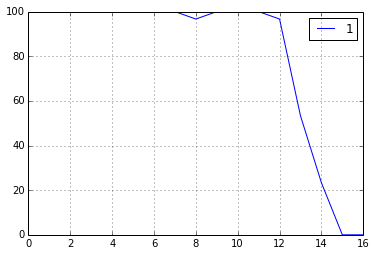

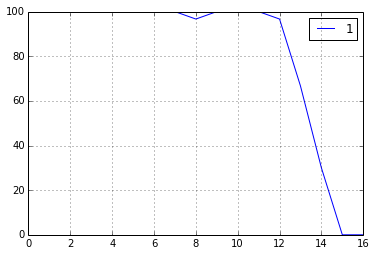

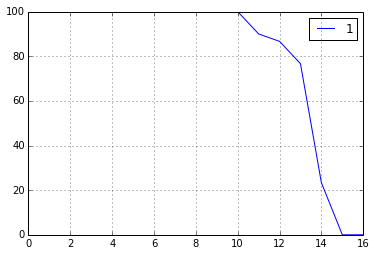

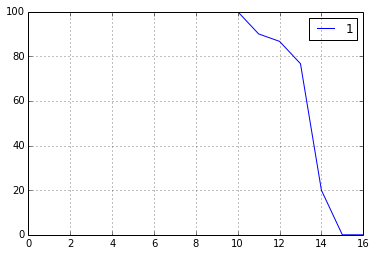

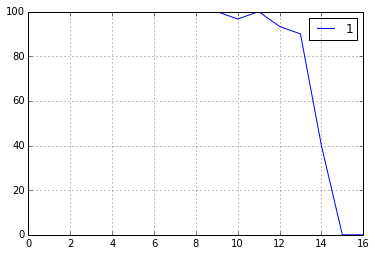

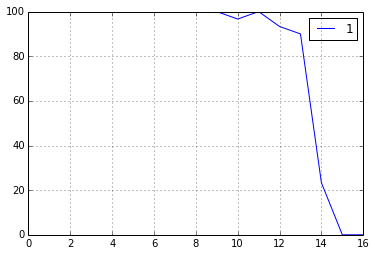

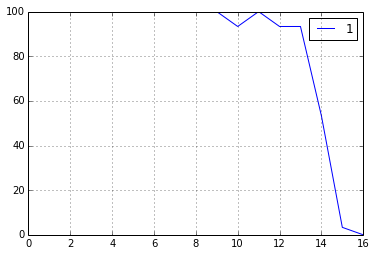

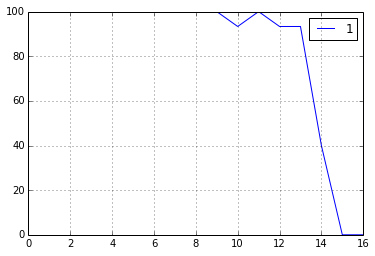

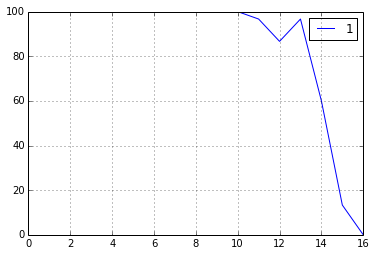

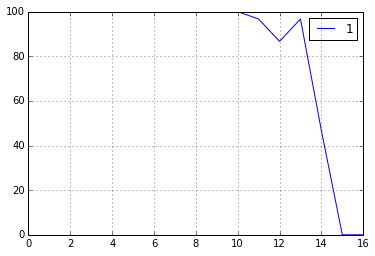

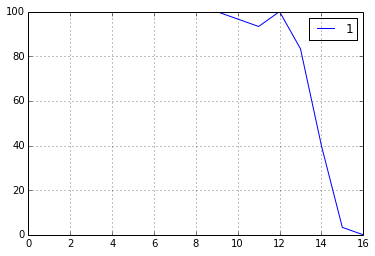

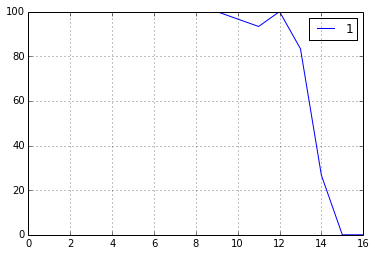

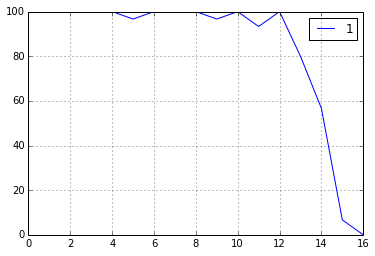

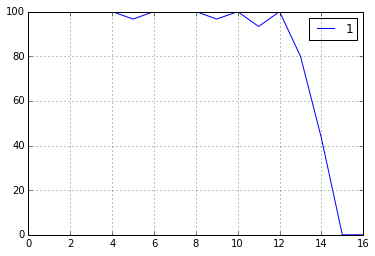

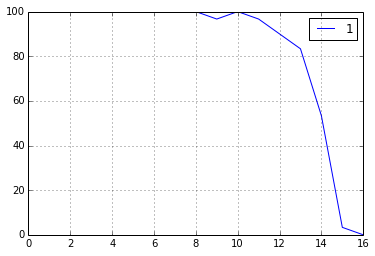

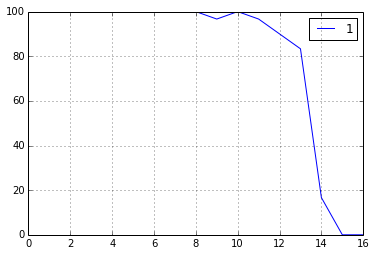

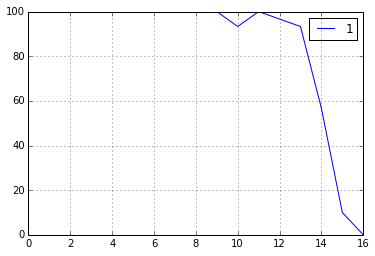

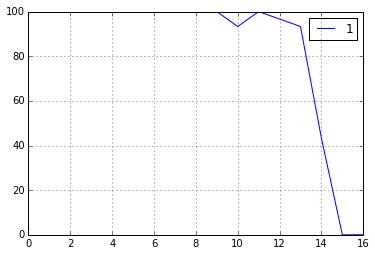

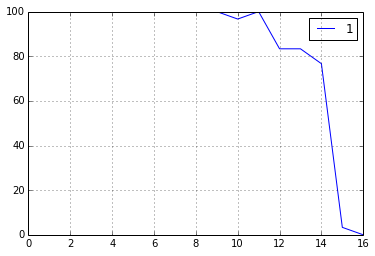

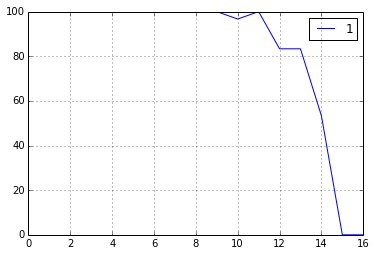

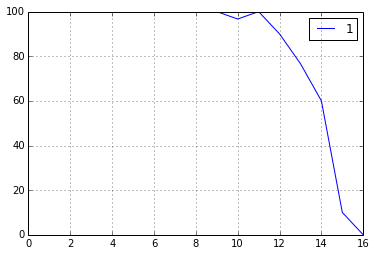

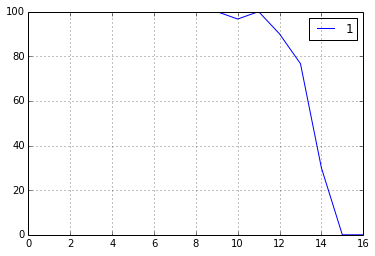

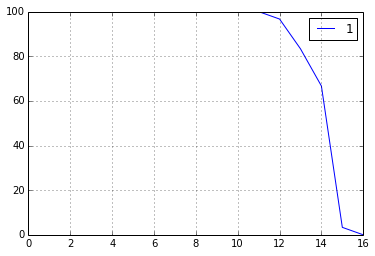

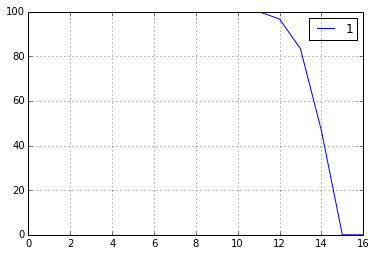

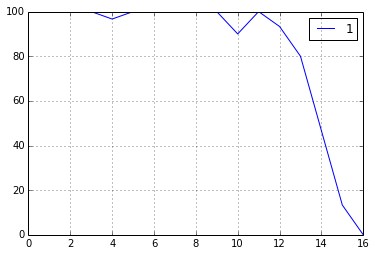

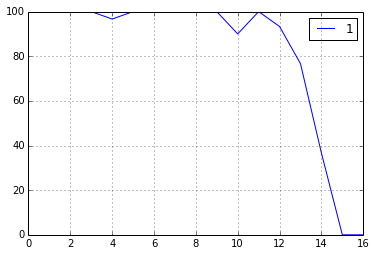

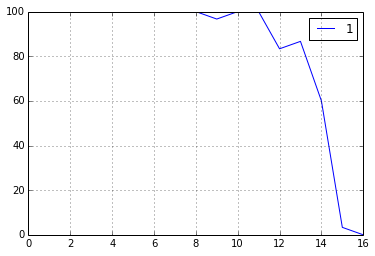

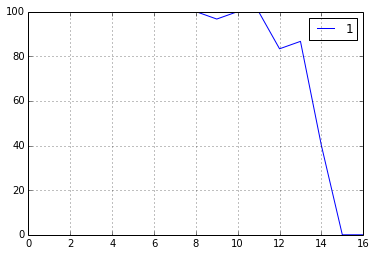

In [2]:
'''ONLY  CHANGE THE DISEASE LIFETIME IN THIS FILE (ie. the k variable)'''
q = 1
for index in range(15):
    vaccinationnum = 0
    orderedpairlistHighEpi = []
    orderedpairlistLowEpi = []
    while vaccinationnum < 250:
        trials = 30
        HighEpi = 0
        FinalEpi = 0
        for x in range(trials):

            g = graph.Graph(q, .5, 0,vaccinationnum)   #k,p,r,%infected,%vaccinated
            g.makeVertices(250)         #of people
            g.makeConnections(.02)         #prob they are connected
            g.update()            #number of repetitions, num trials
            if g.getHighEpi():
                HighEpi += 1
            if g.getFinalEpi():
                FinalEpi += 1
    
        orderedpairlistHighEpi = orderedpairlistHighEpi + [[vaccinationnum,(float(HighEpi)/float(trials))*100]]
        orderedpairlistLowEpi = orderedpairlistLowEpi + [[vaccinationnum, (float(FinalEpi)/float(trials))*100]]

        y = (vaccinationnum,(float(HighEpi)/float(trials))*100 , (float(FinalEpi)/float(trials))*100)
    
        vaccinationnum += 15
    

    df = pandas.DataFrame(orderedpairlistHighEpi)
    df1 = pandas.DataFrame(orderedpairlistLowEpi)
    del df[0]
    del df1[0]
    df.plot(ylim=(0,100))
    df1.plot(ylim=(0,100))
    print(q)
    
    q = q + 2